In [1]:
import numpy as np
import gzip

import seaborn as sns
import matplotlib.pyplot as plt

from Bio import SeqIO

## Download the data from [1000 Genome Projects](https://www.internationalgenome.org)

In [4]:
!rm -f SRR003265.filt.fastq.gz 2>/dev/null
!curl -O ftp://ftp.1000genomes.ebi.ac.uk/vol1/ftp/phase3/data/NA18489/sequence_read/SRR003265.filt.fastq.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 27.5M  100 27.5M    0     0  2519k      0  0:00:11  0:00:11 --:--:-- 2682k     0      0 --:--:--  0:00:01 --:--:--     0   0  0:00:21  0:00:02  0:00:19 1286k


## Read the FASTQ file

In [5]:
recs = SeqIO.parse(gzip.open('SRR003265.filt.fastq.gz', 'rt', encoding='utf-8'), 'fastq')
rec = next(recs)
print(rec)
print(rec.id, rec.description, rec.seq)
print(rec.letter_annotations) # quality scores of our reads, per letter

ID: SRR003265.31
Name: SRR003265.31
Description: SRR003265.31 3042NAAXX:3:1:1252:1819 length=51
Number of features: 0
Per letter annotation for: phred_quality
Seq('GGGAAAAGAAAAACAAACAAACAAAAACAAAACACAGAAACAAAAAAACCA')
SRR003265.31 SRR003265.31 3042NAAXX:3:1:1252:1819 length=51 GGGAAAAGAAAAACAAACAAACAAAAACAAAACACAGAAACAAAAAAACCA
{'phred_quality': [40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 30, 23, 40, 32, 35, 29, 40, 16, 40, 40, 32, 35, 31, 40, 40, 39, 22, 40, 24, 20, 28, 31, 12, 31, 10, 22, 28, 13, 26, 20, 23, 23]}


In [15]:
from collections import defaultdict

In [19]:
# Count each base in the file
recs = SeqIO.parse(gzip.open('SRR003265.filt.fastq.gz', 'rt', encoding='UTF-8'), 'fastq')
count = defaultdict(int)
for rec in recs:
    for letter in rec.seq:
        count[letter] += 1
tot = sum(count.values())
for letter, count in count.items():
    print(f'{letter}: {round((100. * count / tot), 2)} = {count} counts')

G: 20.68 = 5359334 counts
A: 28.6 = 7411965 counts
C: 21.0 = 5444053 counts
T: 29.58 = 7666885 counts
N: 0.14 = 37289 counts


In [24]:
recs = SeqIO.parse(gzip.open('SRR003265.filt.fastq.gz', 'rt', encoding='utf-8'), 'fastq')
rec = next(recs)
print(len(rec.letter_annotations['phred_quality']))

51


In [25]:
# Check the qulaity scores
recs = SeqIO.parse(gzip.open('SRR003265.filt.fastq.gz', 'rt', encoding='utf-8'), 'fastq')

# Initialize
seq_length = None
qual_scores = defaultdict(list)

for rec in recs:
    if seq_length is None:
        seq_length = len(rec.seq)
    for idx, qual in enumerate(rec.letter_annotations['phred_quality']):
        location = idx + 1
        if location not in qual_scores:
            qual_scores[location] = []
        qual_scores[location].append(qual)

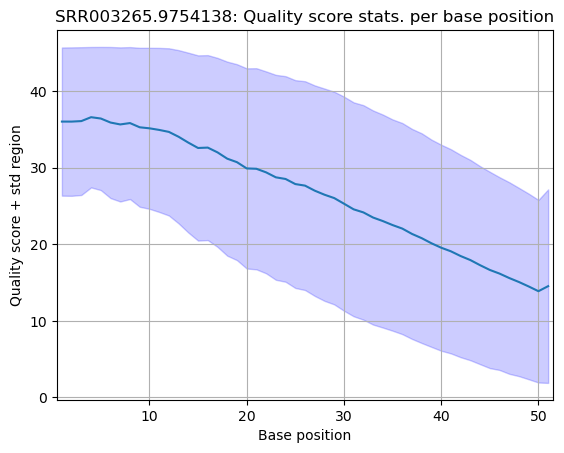

In [31]:
plt.plot(qual_scores.keys(), [np.mean(v) for v in qual_scores.values()])
std_devs = [np.std(v) for v in qual_scores.values()]
plt.fill_between(qual_scores.keys(), 
                 [np.mean(v) - s for v, s in zip(qual_scores.values(), std_devs)], 
                 [np.mean(v) + s for v, s in zip(qual_scores.values(), std_devs)], 
                 color='b', alpha=0.2)
plt.title(f'{rec.id}: Quality score stats. per base position')
plt.xlabel('Base position')
plt.ylabel('Quality score + std region')
plt.xlim(0.5, seq_length+0.5)
plt.grid(True)
plt.show()